In [21]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

file_name = 'https://raw.githubusercontent.com/Bruno492151/tareas/main/EXECUTION_USA.csv'
data = pd.read_csv(file_name)


print(data.head())
print(data)

         Date             Name  Age   Sex   Race   Crime  Victim Count  \
0  01/17/1977     Gary Gilmore   36  Male  White  Murder             1   
1  05/25/1979  John Spenkelink   30  Male  White  Murder             1   
2  10/22/1979     Jesse Bishop   46  Male  White  Murder             1   
3  03/09/1981      Steven Judy   24  Male  White  Murder             4   
4  08/10/1982    Frank Coppola   38  Male  White  Murder             1   

         Victim Sex Victim Race             County State   Region  \
0              Male       White               Utah    UT     West   
1              Male       White               Leon    FL    South   
2              Male       White              Clark    NV     West   
3  2 Male, 2 Female       White             Marion    IN  Midwest   
4              Male       White  Newport News City    VA    South   

          Method Juvenile Volunteer Federal Foreign National  
0   Firing Squad       No       Yes      No               No  
1  Electrocuti

# New Section

In [ ]:
data.tail()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
1437,10/05/2016,Barney Fuller,53,Male,White,Murder,2,"1 Male, 1 Female",White,Houston County,TX,South,Lethal Injection,No,Yes,No,No
1438,10/19/2016,Gregory Lawler,63,Male,White,Murder,1,Male,White,Fulton,GA,South,Lethal Injection,No,No,No,No
1439,11/16/2016,Steven Spears,54,Male,White,Murder,1,Female,White,Lumpkin,GA,South,Lethal Injection,No,Yes,No,No
1440,12/06/2016,William Sallie,50,Male,White,Murder,1,Male,White,Bacon,GA,South,Lethal Injection,No,No,No,No
1441,12/08/2016,Ronald Smith,45,Male,White,Murder,1,Male,White,Madison,AL,South,Lethal Injection,No,No,No,No


In [ ]:
data.isnull()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1439,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1440,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

,0
Date,0
Name,0
Age,0
Sex,0
Race,0
Crime,0
Victim Count,0
Victim Sex,5
Victim Race,6
County,2


In [ ]:
data.describe()

,Age,Victim Count
count,1442.000000,1442.000000
mean,41.479889,1.537448
std,9.471676,4.495852
min,22.000000,1.000000
25%,34.000000,1.000000
50%,40.000000,1.000000
75%,47.000000,1.750000
max,77.000000,168.000000


In [ ]:
conteo=data.groupby('Method').size().reset_index(name='Conteo')
conteo

,Method,Conteo
0,Electrocution,158
1,Firing Squad,3
2,Gas Chamber,11
3,Hanging,3
4,Lethal Injection,1267


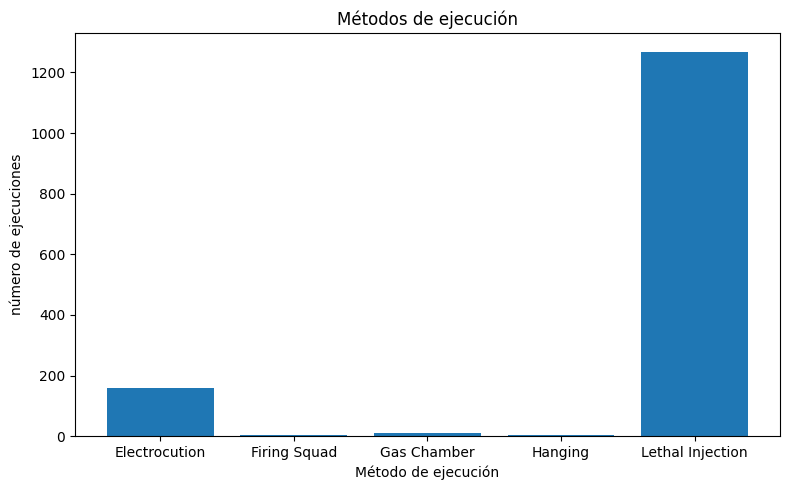

In [19]:
method_counts = data.groupby('Method')['Method'].count()
plt.figure(figsize=(8, 5))
plt.bar(method_counts.index, method_counts.values)
plt.xlabel("Método de ejecución")
plt.ylabel("número de ejecuciones")
plt.title("Métodos de ejecución")
plt.savefig('metodo.png', dpi=300, format='png')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# New Section

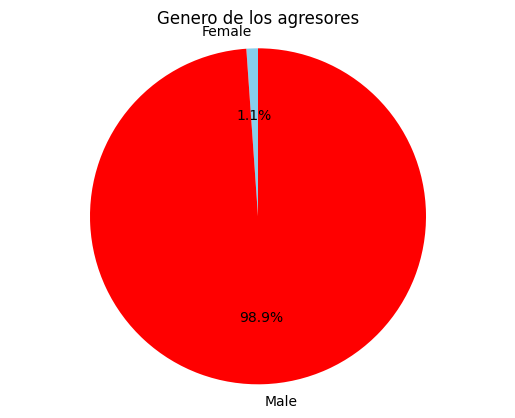

In [18]:
ender_counts = data.groupby('Sex')['Sex'].count()
plt.pie(ender_counts.values, labels=ender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Genero de los agresores')
plt.axis('equal')
plt.savefig('Genero de los agresores.png', dpi=300, format='png')
plt.show()

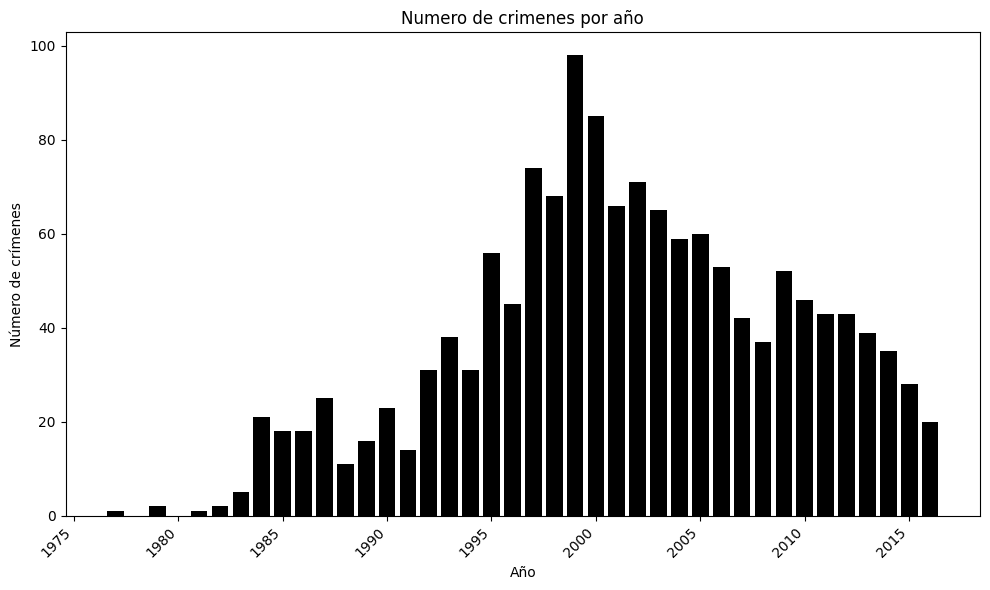

In [17]:

data['Year'] = pd.to_datetime(data['Date']).dt.year
crimes_per_year = data.groupby('Year')['Year'].count().reset_index(name='Crime_Count')
plt.figure(figsize=(10, 6))
plt.bar(crimes_per_year['Year'], crimes_per_year['Crime_Count'], color='black')
plt.title('Numero de crimenes por año')
plt.xlabel('Año')
plt.ylabel('Número de crímenes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Crimenes por año.png', dpi=300, format='png')

plt.show()

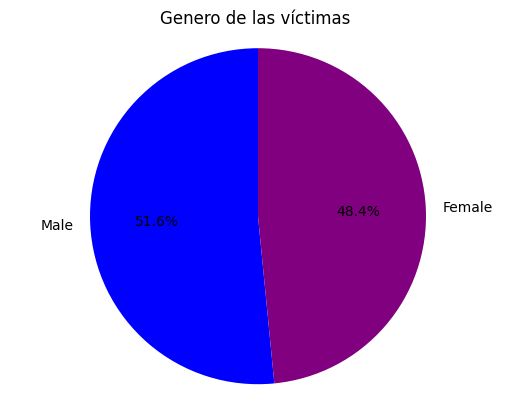

In [16]:

victim_sex = data.groupby('Victim Sex')['Victim Sex'].count()
victim_sex = victim_sex.loc[['Male', 'Female']]
plt.pie(victim_sex.values,
        labels=victim_sex.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['blue', 'purple'])
plt.title('Genero de las víctimas ')
plt.axis('equal')
plt.savefig('Genero de víctimas.png', dpi=300, format='png')
plt.show()

In [ ]:
conteo=data.groupby('Age').size().reset_index(name='Conteo')
conteo

,Age,Conteo
0,22,1
1,23,2
2,24,5
3,25,11
4,26,12
5,27,30
6,28,29
7,29,34
8,30,40
9,31,49


In [ ]:
conteo=data.groupby('State').size().reset_index(name='Conteo')

conteo

,State,Conteo
0,AL,58
1,AR,27
2,AZ,37
3,CA,13
4,CO,1
5,CT,1
6,DE,16
7,FE,3
8,FL,92
9,GA,69


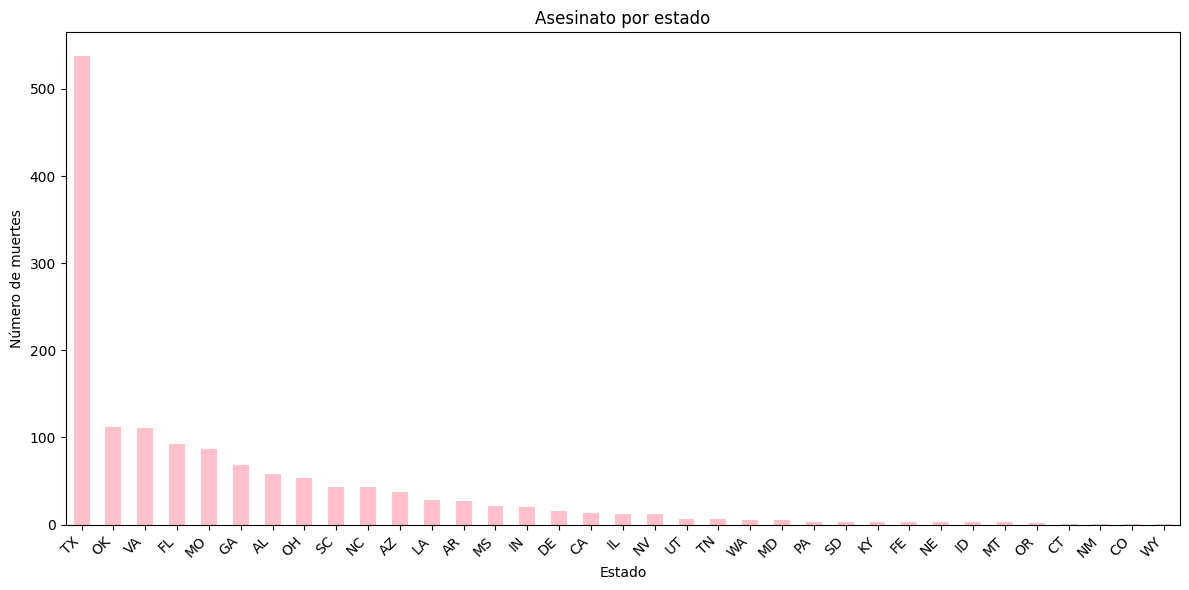

In [15]:
state_kill_counts = data.groupby('State')['State'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
state_kill_counts.plot(kind='bar',color='pink')
plt.xlabel("Estado")
plt.ylabel("Número de muertes")
plt.title("Asesinato por estado")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Asesinatos estado.png', dpi=300, format='png')
plt.show()

In [ ]:
SL=data[data['State']=='TX']

In [ ]:
SL.head()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National,Year
5,12/07/1982,Charlie Brooks,40,Male,Black,Murder,1,Male,White,Tarrant,TX,South,Lethal Injection,No,No,No,No,1982
13,03/14/1984,James Autry,29,Male,White,Murder,1,Female,White,Jefferson,TX,South,Lethal Injection,No,No,No,No,1984
15,03/31/1984,Ronald O'Bryan,39,Male,White,Murder,1,Male,White,Harris,TX,South,Lethal Injection,No,No,No,No,1984
27,10/30/1984,Thomas Barefoot,39,Male,White,Murder,1,Male,White,Bell,TX,South,Lethal Injection,No,No,No,No,1984
35,01/16/1985,Doyle Skillern,48,Male,White,Murder,1,Male,White,Live Oak,TX,South,Lethal Injection,No,No,No,No,1985


In [ ]:
SL = SL.drop('State', axis=1)

In [ ]:
SL[15:20]

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,Region,Method,Juvenile,Volunteer,Federal,Foreign National,Year
62,08/20/1986,Randy Woolls,36,Male,White,Murder,1,Female,White,Tom Green,South,Lethal Injection,No,No,No,No,1986
63,08/22/1986,Larry Smith,30,Male,Black,Murder,1,Male,White,El Paso,South,Lethal Injection,No,No,No,No,1986
64,08/26/1986,Chester Wicker,37,Male,White,Murder,1,Female,White,Galveston,South,Lethal Injection,No,No,No,No,1986
66,12/04/1986,Michael Evans,30,Male,Black,Murder,1,Female,Latino,Dallas,South,Lethal Injection,No,No,No,No,1986
67,12/18/1986,Richard Andrade,25,Male,Latino,Murder,1,Female,Latino,Nueces,South,Lethal Injection,No,No,No,No,1986


In [ ]:
conteo=data.groupby('Federal').size().reset_index(name='Conteo')
conteo

,Federal,Conteo
0,No,1439
1,Yes,3


In [ ]:
conteo=data.groupby('Juvenil').size().reset_index(name='Conteo')
conteo

,Juvenile,Conteo
0,No,1420
1,Yes,22


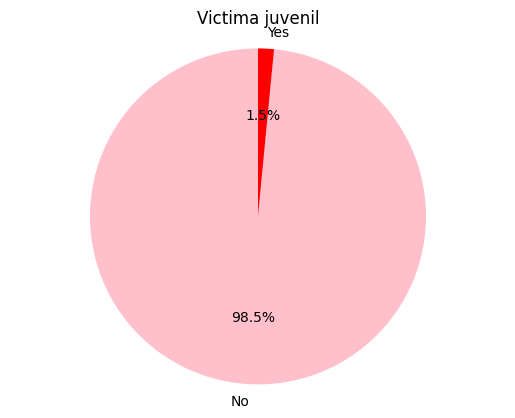

In [14]:
ender_counts = data.groupby('Juvenile')['Juvenile'].count()
plt.pie(ender_counts.values, labels=ender_counts.index, autopct='%1.1f%%', startangle=90, colors=['pink', 'red'])
plt.title('Victima juvenil')
plt.axis('equal')
plt.savefig('Victima juvenil.png', dpi=300, format='png')
plt.show()

In [ ]:
conteo=data.groupby('Victim Count').size().reset_index(name='Conteo')
conteo

,Victim Count,Conteo
0,1,1081
1,2,219
2,3,86
3,4,34
4,5,11
5,6,6
6,8,1
7,9,1
8,12,1
9,16,1


In [ ]:
conteo=data.groupby('Volunteer').size().reset_index(name='Conteo')
conteo

,Volunteer,Conteo
0,No,1297
1,Yes,145


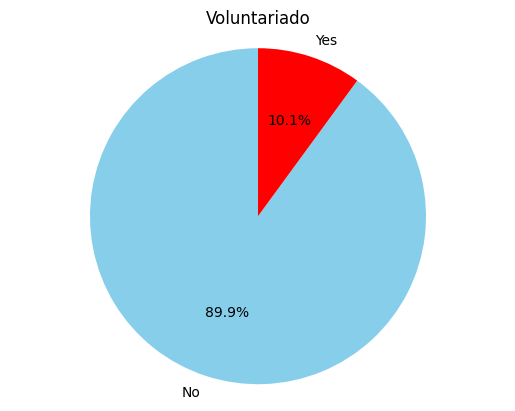

In [12]:
ender_counts = data.groupby('Volunteer')['Volunteer'].count()
plt.pie(ender_counts.values, labels=ender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'red'])
plt.title('Voluntariado')
plt.savefig('Voluntariado.png', dpi=300, format='png')
plt.axis('equal')  #


plt.show()

In [ ]:
conteo=data.groupby('Foreign National').size().reset_index(name='Conteo')
conteo

,Foreign National,Conteo
0,No,1406
1,Yes,36


In [ ]:
conteo=data.groupby('Victim Race').size().reset_index(name='Conteo')
conteo

,Victim Race,Conteo
0,"1 White, 1 Black",8
1,"1 White, 1 Latino",8
2,"1 White, 2 Black",2
3,"1 White, 2 Latino",3
4,"1 White, 3 Asian",1
5,"1 White, 3 Latino",1
6,"1 White, 8 Latino",1
7,"2 White, 1 Asian",2
8,"2 White, 1 Black",3
9,"2 White, 1 Latino",1


In [ ]:
conteo=data.groupby('Race').size().reset_index(name='Conteo')
conteo

,Race,Conteo
0,Asian,6
1,Black,495
2,Latino,120
3,Native American,16
4,Other,2
5,White,803


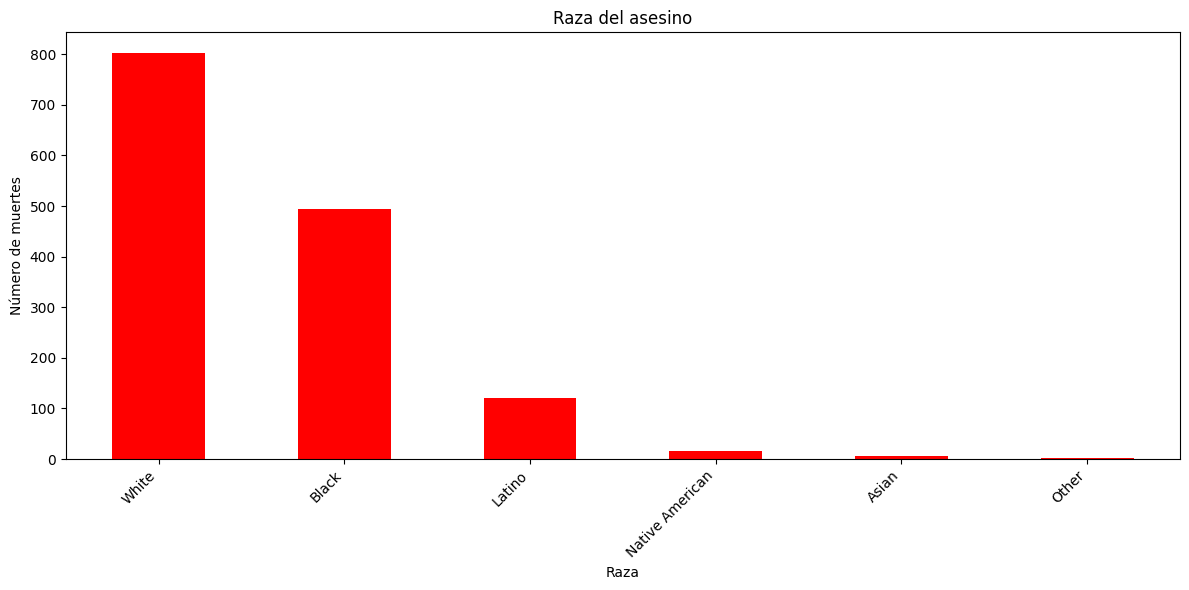

In [13]:
Race_perpetror_counts=data.groupby('Race')['Race'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
Race_perpetror_counts.plot(kind='bar',color='red')
plt.xlabel("Raza")
plt.ylabel("Número de muertes")
plt.title("Raza del asesino")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Raza del asesino.png', dpi=300, format='png')
plt.show()